<a href="https://colab.research.google.com/github/juantijero/ML_HW/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

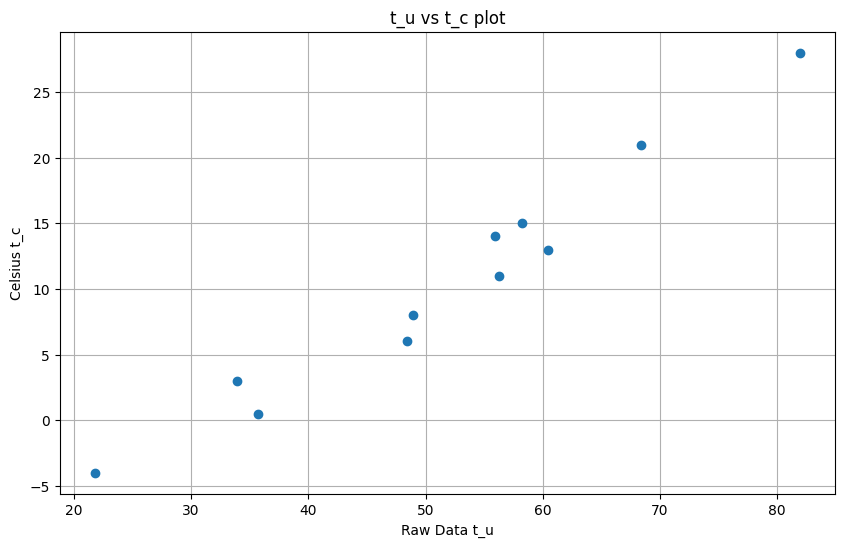

In [1]:
import torch
import matplotlib.pyplot as plt

t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

plt.figure(figsize=(10, 6))
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

plt.title("t_u vs t_c plot")
plt.xlabel("Raw Data t_u")
plt.ylabel("Celsius t_c")
plt.grid(True)
plt.show()

Generating plot of 0-to-1 normalized data...


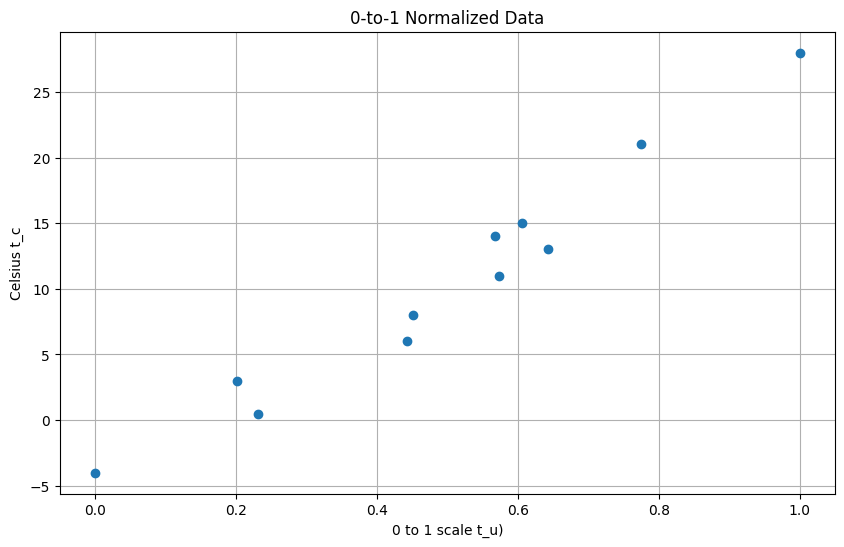

In [2]:
#Scaling and Normalization
t_u_min = t_u.min()
t_u_max = t_u.max()
t_u_norm = (t_u - t_u_min) / (t_u_max - t_u_min)

# --- Plotting the 0-to-1 Scaled Data ---
print("Generating plot of 0-to-1 normalized data...")
plt.figure(figsize=(10, 6))

# Plot the new t_u_norm (x-axis) vs. t_c (y-axis)
plt.plot(t_u_norm.numpy(), t_c.numpy(), 'o')

# --- Add labels ---
plt.title("0-to-1 Normalized Data")
plt.xlabel("0 to 1 scale t_u)")
plt.ylabel("Celsius t_c")
plt.grid(True)
plt.show()

Epoch 500, Loss: 2.2491
Epoch 1000, Loss: 2.1630
Epoch 1500, Loss: 2.1237
Epoch 2000, Loss: 2.1058
Epoch 2500, Loss: 2.0976
Epoch 3000, Loss: 2.0939
Epoch 3500, Loss: 2.0922
Epoch 4000, Loss: 2.0914
Epoch 4500, Loss: 2.0910
Epoch 5000, Loss: 2.0909
--- NEW BEST MODEL FOUND! Loss: 2.0909 ---
--- Winning Params (w2, w1, b): tensor([10.3518, 22.1648, -3.8813]) ---
Epoch 500, Loss: 7.9342
Epoch 1000, Loss: 3.0644
Epoch 1500, Loss: 2.4476
Epoch 2000, Loss: 2.3541
Epoch 2500, Loss: 2.3260
Epoch 3000, Loss: 2.3073
Epoch 3500, Loss: 2.2909
Epoch 4000, Loss: 2.2758
Epoch 4500, Loss: 2.2618
Epoch 5000, Loss: 2.2489
Epoch 500, Loss: 47.5100
Epoch 1000, Loss: 32.4626
Epoch 1500, Loss: 26.3780
Epoch 2000, Loss: 21.8214
Epoch 2500, Loss: 18.1495
Epoch 3000, Loss: 15.1729
Epoch 3500, Loss: 12.7588
Epoch 4000, Loss: 10.8008
Epoch 4500, Loss: 9.2126
Epoch 5000, Loss: 7.9243
Epoch 500, Loss: 152.5030
Epoch 1000, Loss: 125.8209
Epoch 1500, Loss: 105.4138
Epoch 2000, Loss: 89.7627
Epoch 2500, Loss: 77.717

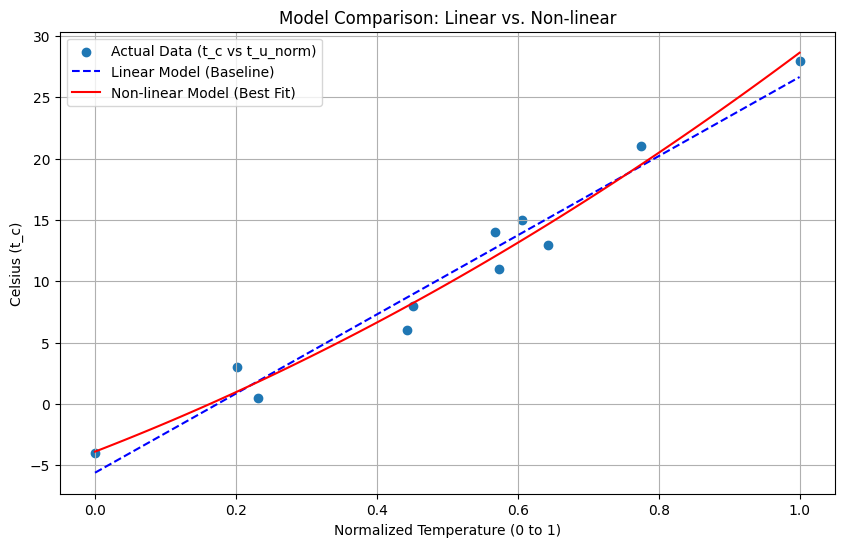

In [7]:
def model_nonlinear(t_u_input, w2, w1, b):
    return w2 * t_u_input**2 + w1 * t_u_input + b

def loss_fn_manual(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

learning_rates = [0.1, 0.01, 0.001, 0.0001]
n_epochs = 5000

best_params_nonlinear = None
min_final_loss = float('inf')

for lr in learning_rates:
    params = torch.tensor([0.0, 0.0, 0.0], requires_grad=True)

    for epoch in range(1, n_epochs + 1):
        t_p = model_nonlinear(t_u_norm, params[0], params[1], params[2])
        loss = loss_fn_manual(t_p, t_c)

        if torch.isnan(loss):
            print(f"Epoch {epoch}: Loss exploded! (nan). Stopping this run.")
            break

        if params.grad is not None:
            params.grad.zero_()
        loss.backward()

        with torch.no_grad():
            params -= lr * params.grad

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

    final_loss = loss.item()
    if not torch.isnan(loss) and final_loss < min_final_loss:
        min_final_loss = final_loss
        best_params_nonlinear = params.detach().clone()
        print(f"--- NEW BEST MODEL FOUND! Loss: {final_loss:.4f} ---")
        print(f"--- Winning Params (w2, w1, b): {best_params_nonlinear} ---")

def model_linear(t_u_input, w, b):
    return w * t_u_input + b

params_linear = torch.tensor([32.0, -4.0], requires_grad=True)
loss_fn_linear = torch.nn.MSELoss()
lr_linear = 1e-2

for epoch in range(1, 5001):
    t_p_lin = model_linear(t_u_norm, params_linear[0], params_linear[1])
    loss_lin = loss_fn_linear(t_p_lin, t_c)

    if params_linear.grad is not None:
        params_linear.grad.zero_()
    loss_lin.backward()
    with torch.no_grad():
        params_linear -= lr_linear * params_linear.grad

final_loss_linear = loss_lin.item()
params_linear_final = params_linear.detach().clone()
print(f"Baseline Linear Model Final Loss: {final_loss_linear:.4f}")

print("\n--- Final Loss Comparison ---")
print(f"Baseline Linear Model:   {final_loss_linear:.4f}")
print(f"Best Non-linear Model: {min_final_loss:.4f}")

if min_final_loss < final_loss_linear:
    print("Result: The non-linear model is a better fit!")
else:
    print("Result: The linear model performed better (this is unexpected).")

print("\nGenerating plot...")

if best_params_nonlinear is None:
    print("Error: All training runs failed (loss was 'nan'). Cannot plot.")
else:
    w2, w1, b = best_params_nonlinear
    w_lin, b_lin = params_linear_final

    t_u_range = torch.linspace(t_u_norm.min(), t_u_norm.max(), 100)

    t_p_nonlinear_curve = model_nonlinear(t_u_range, w2, w1, b)
    t_p_linear_curve = model_linear(t_u_range, w_lin, b_lin)

    plt.figure(figsize=(10, 6))

    plt.scatter(t_u_norm.numpy(), t_c.numpy(), label="Actual Data (t_c vs t_u_norm)")

    plt.plot(t_u_range.numpy(), t_p_linear_curve.detach().numpy(),
             color='blue', linestyle='--', label="Linear Model (Baseline)")

    plt.plot(t_u_range.numpy(), t_p_nonlinear_curve.detach().numpy(),
             color='red', label="Non-linear Model (Best Fit)")

    plt.title("Model Comparison: Linear vs. Non-linear")
    plt.xlabel("Normalized Temperature (0 to 1)")
    plt.ylabel("Celsius (t_c)")
    plt.legend()
    plt.grid(True)
    plt.show()